In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Diamonds Dataset
#### Source : https://www.kaggle.com/shivam2503/diamonds
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [2]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

### Taking fraction of data
Only taking 20% data of actual data

In [4]:
data = data.sample(frac=0.2)

In [5]:
data.shape

(10788, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 51180 to 36123
Data columns (total 10 columns):
carat      10788 non-null float64
cut        10788 non-null object
color      10788 non-null object
clarity    10788 non-null object
depth      10788 non-null float64
table      10788 non-null float64
price      10788 non-null int64
x          10788 non-null float64
y          10788 non-null float64
z          10788 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 927.1+ KB


### Checking NULL values

In [7]:
data.reset_index(inplace=True, drop=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.60,Ideal,G,VVS2,62.0,57.0,2347,5.41,5.46,3.37
1,1.56,Ideal,F,VS2,62.0,55.0,17108,7.41,7.45,4.61
2,0.50,Ideal,G,VVS2,62.0,56.0,1838,5.09,5.13,3.17
3,0.75,Ideal,D,VS2,61.7,55.0,3625,5.82,5.85,3.60
4,1.00,Fair,E,VS2,67.0,54.0,5729,6.23,6.18,4.16


### Finding correlations between features 

In [8]:
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.021401,0.185431,0.918917,0.976744,0.950520,0.900545
depth,0.021401,1.000000,-0.304217,-0.019741,-0.034694,-0.036527,0.083690
table,0.185431,-0.304217,1.000000,0.131284,0.198425,0.184462,0.140583
price,0.918917,-0.019741,0.131284,1.000000,0.884991,0.863746,0.811747
x,0.976744,-0.034694,0.198425,0.884991,1.000000,0.973221,0.915349
y,0.950520,-0.036527,0.184462,0.863746,0.973221,1.000000,0.897338
z,0.900545,0.083690,0.140583,0.811747,0.915349,0.897338,1.000000


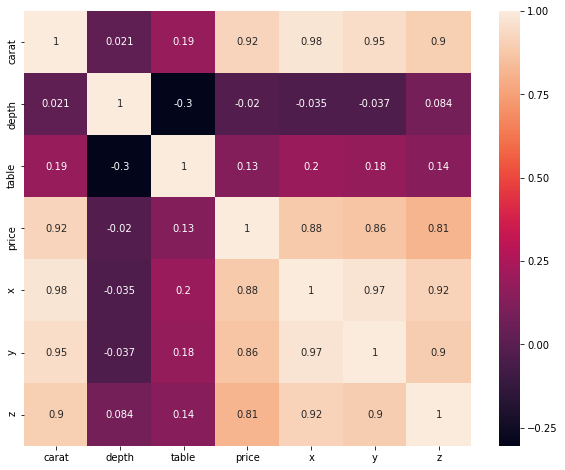

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

### Find unique values

In [10]:
data['cut'].unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [11]:
data['color'].unique()

array(['G', 'F', 'D', 'E', 'H', 'I', 'J'], dtype=object)

In [12]:
data['clarity'].unique()

array(['VVS2', 'VS2', 'SI1', 'VS1', 'VVS1', 'IF', 'SI2', 'I1'],
      dtype=object)

### Count values and plot the graph

In [13]:
data['cut'].value_counts()

Ideal        4304
Premium      2787
Very Good    2366
Good         1012
Fair          319
Name: cut, dtype: int64

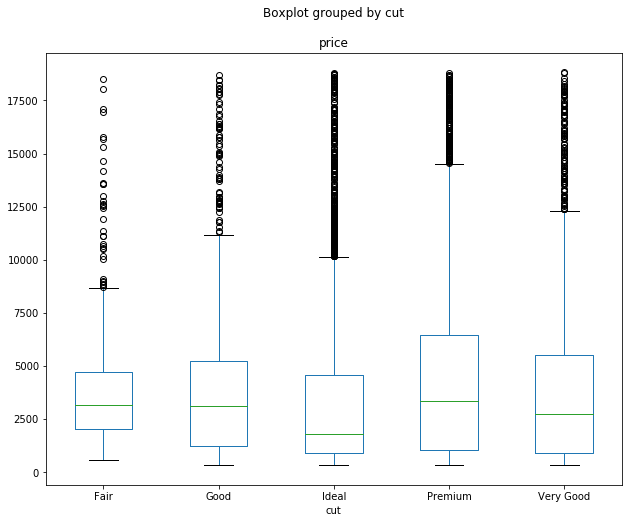

In [14]:
data.boxplot(by ='cut', column =['price'], grid = False, figsize=(10, 8)) 

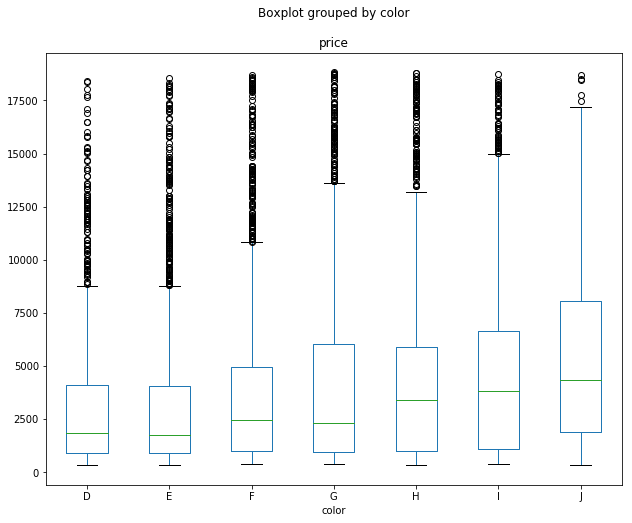

In [15]:
data.boxplot(by ='color', column =['price'], grid = False, figsize=(10, 8)) 

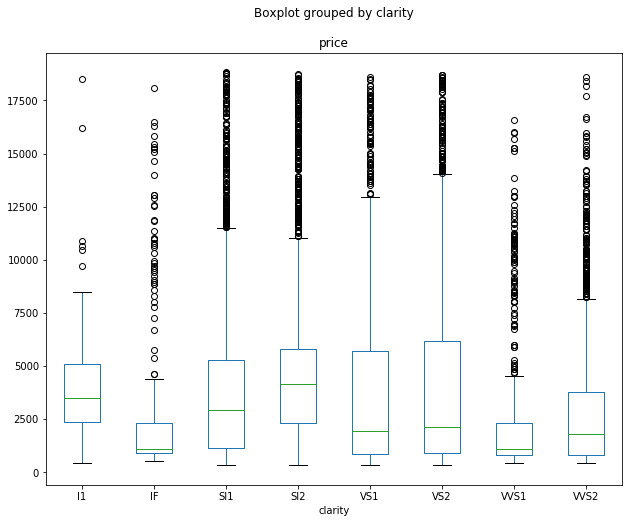

In [16]:
data.boxplot(by ='clarity', column =['price'], grid = False, figsize=(10, 8)) 

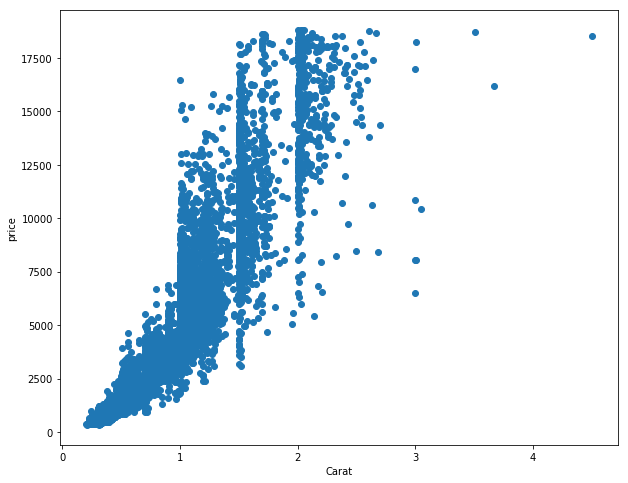

In [17]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['carat'], data['price'])

plt.xlabel("Carat")
plt.ylabel("price")

plt.show()

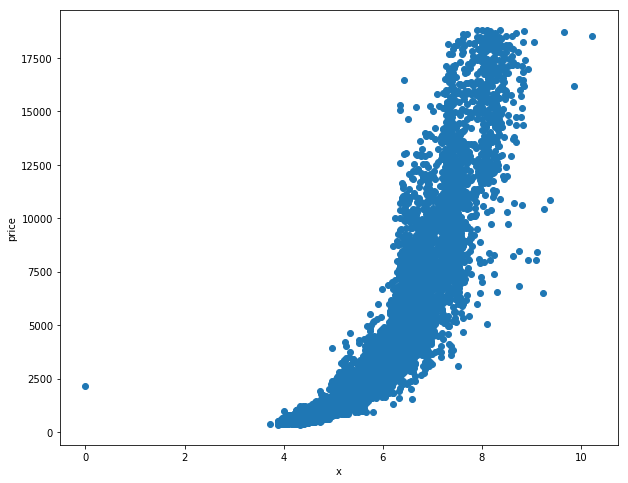

In [18]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['x'], data['price'])

plt.xlabel("x")
plt.ylabel("price")

plt.show()

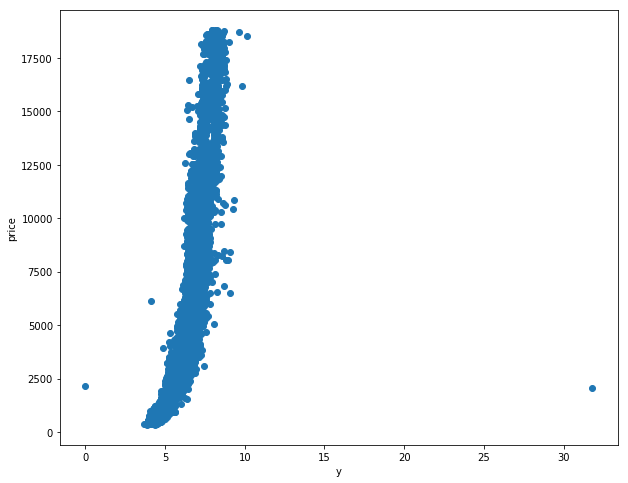

In [19]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['y'], data['price'])

plt.xlabel("y")
plt.ylabel("price")

plt.show()

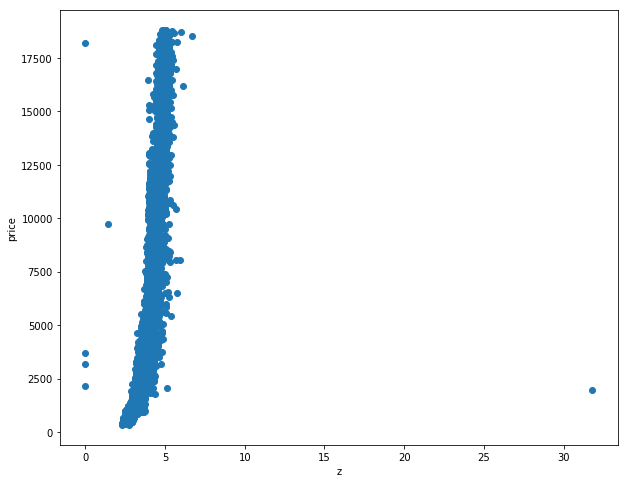

In [20]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['z'], data['price'])

plt.xlabel("z")
plt.ylabel("price")

plt.show()

### Converting categorical into numerical
using label encoder and one hot encoder

In [21]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" :  2, "SI2" : 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.60,Ideal,G,5,62.0,57.0,2347,5.41,5.46,3.37
1,1.56,Ideal,F,3,62.0,55.0,17108,7.41,7.45,4.61
2,0.50,Ideal,G,5,62.0,56.0,1838,5.09,5.13,3.17
3,0.75,Ideal,D,3,61.7,55.0,3625,5.82,5.85,3.60
4,1.00,Fair,E,3,67.0,54.0,5729,6.23,6.18,4.16


In [22]:
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.60,5,62.0,57.0,2347,5.41,5.46,3.37,0,0,1,0,0,0,0,0,1,0,0,0
1,1.56,3,62.0,55.0,17108,7.41,7.45,4.61,0,0,1,0,0,0,0,1,0,0,0,0
2,0.50,5,62.0,56.0,1838,5.09,5.13,3.17,0,0,1,0,0,0,0,0,1,0,0,0
3,0.75,3,61.7,55.0,3625,5.82,5.85,3.60,0,0,1,0,0,1,0,0,0,0,0,0
4,1.00,3,67.0,54.0,5729,6.23,6.18,4.16,1,0,0,0,0,0,1,0,0,0,0,0


In [23]:
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.803279,61.730172,57.486309,5.744626,5.748890,3.547704
std,0.476350,1.468072,2.255684,1.124663,1.144339,0.747739
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.920000
50%,0.700000,61.800000,57.000000,5.700000,5.720000,3.530000
75%,1.050000,62.500000,59.000000,6.560000,6.550000,4.050000
max,4.500000,73.600000,76.000000,10.230000,31.800000,31.800000


In [24]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

array([[-0.42676176,  0.18380582, -0.21560263, -0.29754864, -0.25246258,
        -0.23766603],
       [ 1.5886555 ,  0.18380582, -1.10229272,  1.48084426,  1.4866125 ,
         1.4207434 ],
       [-0.63670105,  0.18380582, -0.65894768, -0.5820915 , -0.54085192,
        -0.50515142],
       [-0.11185281, -0.02055337, -1.10229272,  0.0670219 ,  0.08836118,
         0.06994217],
       [ 0.41299544,  3.58979232, -1.54563777,  0.43159245,  0.37675051,
         0.81890127]])

In [25]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,1.406097e-16,3.023768e-15,-3.075625e-16,-1.360713e-16,-1.499439e-16,6.346734e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.266519e+00,-1.275894e+01,-6.422433e+00,-5.108101e+00,-5.023995e+00,-4.744795e+00
25%,-8.466404e-01,-4.973915e-01,-6.589477e-01,-9.110942e-01,-8.904148e-01,-8.395082e-01
50%,-2.168225e-01,4.756636e-02,-2.156026e-01,-3.968167e-02,-2.524674e-02,-2.367771e-02
75%,5.179651e-01,5.244045e-01,6.710875e-01,7.250273e-01,7.000961e-01,6.717843e-01
max,7.760871e+00,8.085694e+00,8.207953e+00,3.988378e+00,2.276625e+01,3.778538e+01


In [26]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.60,5,62.0,57.0,2347,5.41,5.46,3.37,0,0,1,0,0,0,0,0,1,0,0,0
1,1.56,3,62.0,55.0,17108,7.41,7.45,4.61,0,0,1,0,0,0,0,1,0,0,0,0
2,0.50,5,62.0,56.0,1838,5.09,5.13,3.17,0,0,1,0,0,0,0,0,1,0,0,0
3,0.75,3,61.7,55.0,3625,5.82,5.85,3.60,0,0,1,0,0,1,0,0,0,0,0,0
4,1.00,3,67.0,54.0,5729,6.23,6.18,4.16,1,0,0,0,0,0,1,0,0,0,0,0


In [27]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,5,2347,0,0,1,0,0,0,0,0,1,0,0,0
1,3,17108,0,0,1,0,0,0,0,1,0,0,0,0
2,5,1838,0,0,1,0,0,0,0,0,1,0,0,0
3,3,3625,0,0,1,0,0,1,0,0,0,0,0,0
4,3,5729,1,0,0,0,0,0,1,0,0,0,0,0


In [28]:
numeric_df.head()

,carat,depth,table,x,y,z
0,-0.426762,0.183806,-0.215603,-0.297549,-0.252463,-0.237666
1,1.588656,0.183806,-1.102293,1.480844,1.486613,1.420743
2,-0.636701,0.183806,-0.658948,-0.582092,-0.540852,-0.505151
3,-0.111853,-0.020553,-1.102293,0.067022,0.088361,0.069942
4,0.412995,3.589792,-1.545638,0.431592,0.376751,0.818901


In [29]:
data.shape, numeric_df.shape

((10788, 14), (10788, 6))

In [30]:
data = pd.concat([data, numeric_df], axis=1)

data.shape

(10788, 20)

In [31]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,5,2347,0,0,1,0,0,0,0,0,1,0,0,0,-0.426762,0.183806,-0.215603,-0.297549,-0.252463,-0.237666
1,3,17108,0,0,1,0,0,0,0,1,0,0,0,0,1.588656,0.183806,-1.102293,1.480844,1.486613,1.420743
2,5,1838,0,0,1,0,0,0,0,0,1,0,0,0,-0.636701,0.183806,-0.658948,-0.582092,-0.540852,-0.505151
3,3,3625,0,0,1,0,0,1,0,0,0,0,0,0,-0.111853,-0.020553,-1.102293,0.067022,0.088361,0.069942
4,3,5729,1,0,0,0,0,0,1,0,0,0,0,0,0.412995,3.589792,-1.545638,0.431592,0.376751,0.818901


In [32]:
data.to_csv('datasets/diamonds_processed.csv', index=False)

In [33]:
!ls datasets/

Mall_Customers.csv             diamonds.csv
_DS_Store                      diamonds_processed.csv
bbc-text.csv                   gender_voice_dataset.csv
boston_data.csv                german_credit_data_dataset.csv
cars.csv                       wine.csv


### Spilting into train and test data

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [35]:
x_train.shape, y_train.shape

((8630, 19), (8630,))

In [36]:
x_test.shape, y_test.shape

((2158, 19), (2158,))

### Linear regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [37]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_prediction = linear_regression.predict(x_test)

y_prediction

array([ -873.77864947,  8584.7451308 ,   627.09729416, ...,
       16392.89994841, 13583.37274932, 10632.14077825])

### Find train and test score 

In [39]:
train_score = linear_regression.score(x_train, y_train)

print("Training score : ", train_score)

Training score :  0.9091447208884681


In [40]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_prediction)

print("Testing score : ", score)

Testing score :  0.8906783376037027
